In [2]:
# adding autoload so that we dont need to restart kernel to reload libraries every time
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from neural_network import *
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# creating the dataset
x = np.arange(0,2*np.pi,0.1)
x = np.random.permutation(x)
#y = np.sin(2*x)
y = (np.sin(2*x)>0)*2-1 #square
x_test = np.arange(0.05,2*np.pi,0.1)
#y_test = np.sin(2*x_test)
y_test = (np.sin(2*x_test)>0)*2-1 #square test

In [4]:
#creating the transformation
number_of_rbf_nodes = 63
#means = np.linspace(0, 2*np.pi,number_of_rbf_nodes+2)[1:-1]
means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
#means = np.sort(np.random.rand(number_of_rbf_nodes)*np.max(x))
#means = x
sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
#sigmas = np.ones(number_of_rbf_nodes)*(1.0/32)
rbf = RbfTransformation(means,sigmas)
#rbf = StepTransformation(means)
new_x = np.zeros((len(x), number_of_rbf_nodes))
new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
#transforming the x
for i,x_s in enumerate(x):
    new_x[i] = rbf(x_s)
for i,x_s in enumerate(x_test):
    new_x_test[i] = rbf(x_s)

In [5]:
# creating the network
nn = NN(number_of_rbf_nodes) # the number of inputs
#nn.add_transformation(rbf) # adding the transformation we created
nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end

In [6]:
# training the network
nn.train_batch(new_x,y,63,10000,0.8,0)

([], [])

In [7]:
#prediction
ans = []
ab = 0
for x_s, y_true in zip(new_x,y):
    v = nn.feed_forward(x_s)[1][0]
    ans.append(v)
#    print("v",v,y_true)
    ab+=np.abs((v-y_true))
ab = ab/len(x)
print(ab)
ans = np.array(ans)
ab = 0
for x_s, y_true in zip(new_x_test,y_test):
    v = nn.feed_forward(x_s)[1][0]
    ab+=np.abs((v-y_true))
ab = ab/len(x_test)
print(ab)
ans = np.array(ans)

0.07377976160199985
0.10899798410390699


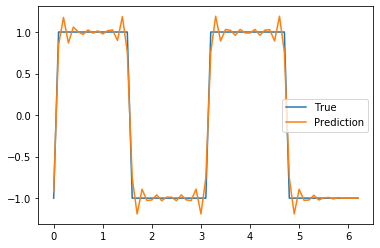

In [8]:
#ploting
indexes = np.argsort(x)
plt.plot(x[indexes],y[indexes], label="True")
plt.plot(x[indexes],ans[indexes], label="Prediction")
plt.legend()

In [1044]:
#try with a range of rbf nodes
training_test_res = []
for nd in range(63,64):
    number_of_rbf_nodes = nd
    means = np.linspace(0, 2*np.pi,number_of_rbf_nodes)
    means = np.random.rand(nd)*2*np.pi
    sigmas = np.ones(number_of_rbf_nodes)*(1.0/(number_of_rbf_nodes*1.2))
    rbf = RbfTransformation(means,sigmas)
    rbf.train_mu(x,0.2,500,winners=1)
    new_x = np.zeros((len(x), number_of_rbf_nodes))
    new_x_test = np.zeros((len(x_test), number_of_rbf_nodes))
    for i,x_s in enumerate(x):
        new_x[i] = rbf(x_s)
    for i,x_s in enumerate(x_test):
        new_x_test[i] = rbf(x_s)
    nn = NN(number_of_rbf_nodes) # the number of inputs
    nn.add_layer(1, function=Linear(), bias_weight=0) #adding a linear layer at the end
    nn.train_batch(new_x,y,1,10000,0.01,0)
    ans = []
    ab = 0
    for x_s, y_true in zip(new_x,y):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x)
    ans.append(ab)
    ab = 0
    for x_s, y_true in zip(new_x_test,y_test):
        v = nn.feed_forward(x_s)[1][0]
        ab+=np.abs((v-y_true))
    ab = ab/len(x_test)
    ans.append(ab)
    training_test_res.append([nd,ans[0],ans[1]])
    print(nd,ans)
    

63 [0.006804554930936141, 0.00687749709399338]


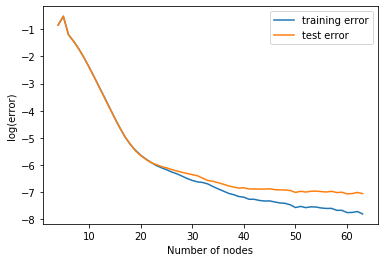

In [985]:
plt.plot(results[:,0],np.log(results[:,1]), label='training error')
plt.plot(results[:,0],np.log(results[:,2]), label='test error')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('log(error)')
#plt.savefig('Lab_2_data/3_1_sin_error.png')

(array([7., 6., 6., 6., 6., 7., 6., 6., 6., 7.]),
 array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
        3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678,
        6.28318531]),
 <a list of 10 Patch objects>)

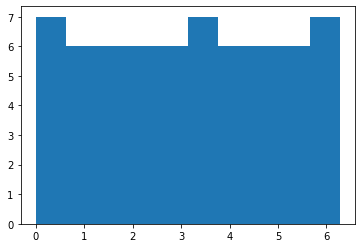

In [9]:
plt.hist(np.sort(rbf.means))

(array([7., 6., 6., 6., 6., 7., 6., 6., 6., 7.]),
 array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
        3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678,
        6.28318531]),
 <a list of 10 Patch objects>)

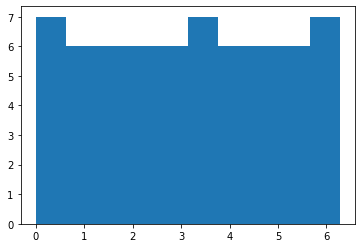

In [10]:
plt.hist(np.sort(rbf.means))